In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('../Model_Ready_Data/combined_data_reg_ready.csv')


In [39]:
X = data.drop('label', axis=1)
y = data['label']


In [40]:
# Initialize the scaler
scaler = MinMaxScaler()  # or StandardScaler()
# Fit the scaler using the training data and scale it
X_scaled = scaler.fit_transform(X)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a SVM Classifier
clf = svm.SVC(kernel='linear')  # You can change the kernel based on your needs.
X_scaled = scaler.fit_transform(X)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear')  # You can change the kernel based on your needs.


In [41]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Added 'poly' and 'sigmoid'
              'probability': [True]}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3, scoring='f1')

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

print(confusion_matrix(y_test, grid_predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=0.1, gamma=1, kernel=linear, probability=True;, score=0.793 total time=   0.0s
[CV 2/5] END C=0.1, gamma=1, kernel=linear, probability=True;, score=0.789 total time=   0.0s
[CV 3/5] END C=0.1, gamma=1, kernel=linear, probability=True;, score=0.758 total time=   0.0s
[CV 4/5] END C=0.1, gamma=1, kernel=linear, probability=True;, score=0.760 total time=   0.0s
[CV 5/5] END C=0.1, gamma=1, kernel=linear, probability=True;, score=0.788 total time=   0.0s
[CV 1/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.796 total time=   0.0s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.807 total time=   0.0s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.764 total time=   0.0s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.791 total time=   0.0s
[CV 1/5] END

[CV 2/5] END C=0.1, gamma=0.0001, kernel=rbf, probability=True;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=rbf, probability=True;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=rbf, probability=True;, score=0.669 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=rbf, probability=True;, score=0.669 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=poly, probability=True;, score=0.672 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=poly, probability=True;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=poly, probability=True;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=poly, probability=True;, score=0.669 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=poly, probability=True;, score=0.669 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=sigmoid, probability=True;, score=0.672 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.000

[CV 1/5] END C=1, gamma=0.001, kernel=sigmoid, probability=True;, score=0.672 total time=   0.0s
[CV 2/5] END C=1, gamma=0.001, kernel=sigmoid, probability=True;, score=0.674 total time=   0.0s
[CV 3/5] END C=1, gamma=0.001, kernel=sigmoid, probability=True;, score=0.674 total time=   0.0s
[CV 4/5] END C=1, gamma=0.001, kernel=sigmoid, probability=True;, score=0.669 total time=   0.0s
[CV 5/5] END C=1, gamma=0.001, kernel=sigmoid, probability=True;, score=0.669 total time=   0.0s
[CV 1/5] END C=1, gamma=0.0001, kernel=linear, probability=True;, score=0.811 total time=   0.0s
[CV 2/5] END C=1, gamma=0.0001, kernel=linear, probability=True;, score=0.819 total time=   0.0s
[CV 3/5] END C=1, gamma=0.0001, kernel=linear, probability=True;, score=0.785 total time=   0.0s
[CV 4/5] END C=1, gamma=0.0001, kernel=linear, probability=True;, score=0.780 total time=   0.0s
[CV 5/5] END C=1, gamma=0.0001, kernel=linear, probability=True;, score=0.838 total time=   0.0s
[CV 1/5] END C=1, gamma=0.0001

[CV 3/5] END C=10, gamma=0.001, kernel=linear, probability=True;, score=0.808 total time=   0.0s
[CV 4/5] END C=10, gamma=0.001, kernel=linear, probability=True;, score=0.786 total time=   0.0s
[CV 5/5] END C=10, gamma=0.001, kernel=linear, probability=True;, score=0.821 total time=   0.0s
[CV 1/5] END C=10, gamma=0.001, kernel=rbf, probability=True;, score=0.744 total time=   0.0s
[CV 2/5] END C=10, gamma=0.001, kernel=rbf, probability=True;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, gamma=0.001, kernel=rbf, probability=True;, score=0.751 total time=   0.0s
[CV 4/5] END C=10, gamma=0.001, kernel=rbf, probability=True;, score=0.736 total time=   0.0s
[CV 5/5] END C=10, gamma=0.001, kernel=rbf, probability=True;, score=0.739 total time=   0.0s
[CV 1/5] END C=10, gamma=0.001, kernel=poly, probability=True;, score=0.672 total time=   0.0s
[CV 2/5] END C=10, gamma=0.001, kernel=poly, probability=True;, score=0.674 total time=   0.0s
[CV 3/5] END C=10, gamma=0.001, kernel=poly, prob

[CV 4/5] END C=100, gamma=0.01, kernel=rbf, probability=True;, score=0.796 total time=   0.0s
[CV 5/5] END C=100, gamma=0.01, kernel=rbf, probability=True;, score=0.841 total time=   0.0s
[CV 1/5] END C=100, gamma=0.01, kernel=poly, probability=True;, score=0.672 total time=   0.0s
[CV 2/5] END C=100, gamma=0.01, kernel=poly, probability=True;, score=0.674 total time=   0.0s
[CV 3/5] END C=100, gamma=0.01, kernel=poly, probability=True;, score=0.674 total time=   0.0s
[CV 4/5] END C=100, gamma=0.01, kernel=poly, probability=True;, score=0.669 total time=   0.0s
[CV 5/5] END C=100, gamma=0.01, kernel=poly, probability=True;, score=0.669 total time=   0.0s
[CV 1/5] END C=100, gamma=0.01, kernel=sigmoid, probability=True;, score=0.811 total time=   0.0s
[CV 2/5] END C=100, gamma=0.01, kernel=sigmoid, probability=True;, score=0.819 total time=   0.0s
[CV 3/5] END C=100, gamma=0.01, kernel=sigmoid, probability=True;, score=0.785 total time=   0.0s
[CV 4/5] END C=100, gamma=0.01, kernel=sigm

[CV 1/5] END C=1000, gamma=0.1, kernel=sigmoid, probability=True;, score=0.697 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.1, kernel=sigmoid, probability=True;, score=0.652 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.1, kernel=sigmoid, probability=True;, score=0.632 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.1, kernel=sigmoid, probability=True;, score=0.628 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.1, kernel=sigmoid, probability=True;, score=0.715 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.01, kernel=linear, probability=True;, score=0.838 total time=   0.3s
[CV 2/5] END C=1000, gamma=0.01, kernel=linear, probability=True;, score=0.823 total time=   0.2s
[CV 3/5] END C=1000, gamma=0.01, kernel=linear, probability=True;, score=0.813 total time=   0.3s
[CV 4/5] END C=1000, gamma=0.01, kernel=linear, probability=True;, score=0.789 total time=   0.3s
[CV 5/5] END C=1000, gamma=0.01, kernel=linear, probability=True;, score=0.796 total time=   0.3s
[CV 1/5] END C=1000,

ROC-AUC: 0.9533994795055303


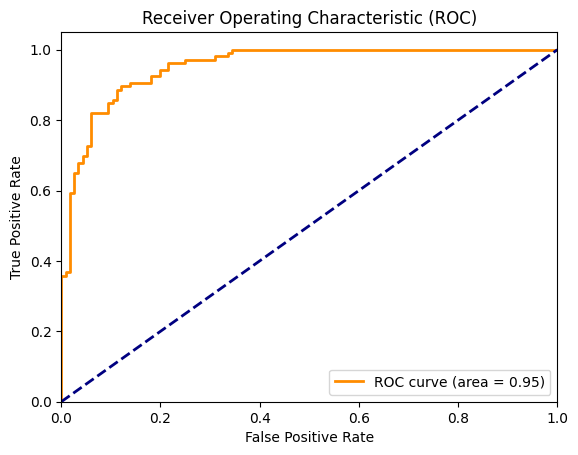

In [42]:
# We will use the GridSearchCV object to predict probabilities on the test set.
y_scores = grid.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
roc_auc = roc_auc_score(y_test, y_scores)

print(f'ROC-AUC: {roc_auc}')

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()